DataSet: Pima Indians Diabetes Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Pima Indians Diabetes Dataset.csv")

In [ ]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.shape)

(768, 9)


In [ ]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
zero_to_nan_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


In [ ]:
df[zero_to_nan_cols] = df[zero_to_nan_cols].replace(0, np.nan)

In [ ]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
before_rows = df.shape[0]
df.drop_duplicates(inplace=True)
after_rows = df.shape[0]

In [ ]:
print(f"\nRows Before Removing Duplicates: {before_rows}")
print(f"Rows After Removing Duplicates: {after_rows}")


Rows Before Removing Duplicates: 768
Rows After Removing Duplicates: 768


In [ ]:
print(df["Outcome"].unique())

[1 0]


In [ ]:
le = LabelEncoder()
df["Outcome"] = le.fit_transform(df["Outcome"])

In [ ]:

print("\nUnique values in Outcome after encoding:")
print(df["Outcome"].unique())


Unique values in Outcome after encoding:
[1 0]


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
print("\nFeature Matrix (X) Shape:", X.shape)
print("Target Vector (y) Shape:", y.shape)


Feature Matrix (X) Shape: (768, 8)
Target Vector (y) Shape: (768,)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeature Scaling Completed.")


Feature Scaling Completed.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42
)

In [ ]:
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (614, 8)
Testing Set Shape: (154, 8)



Generating Histograms...


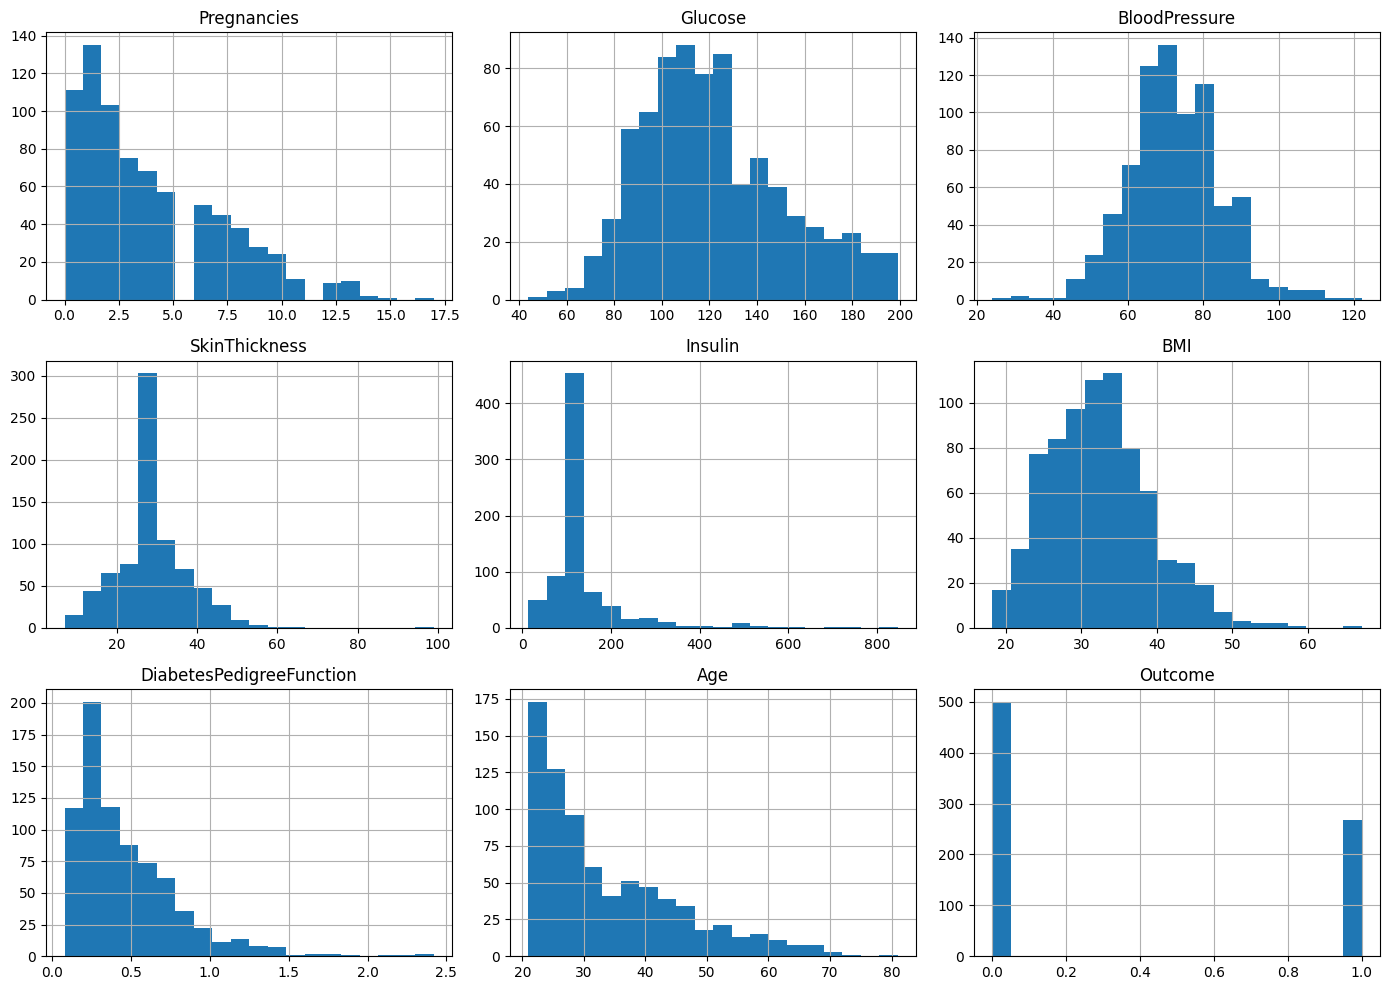

In [ ]:
print("\nGenerating Histograms...")
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


Correlation Heatmap:


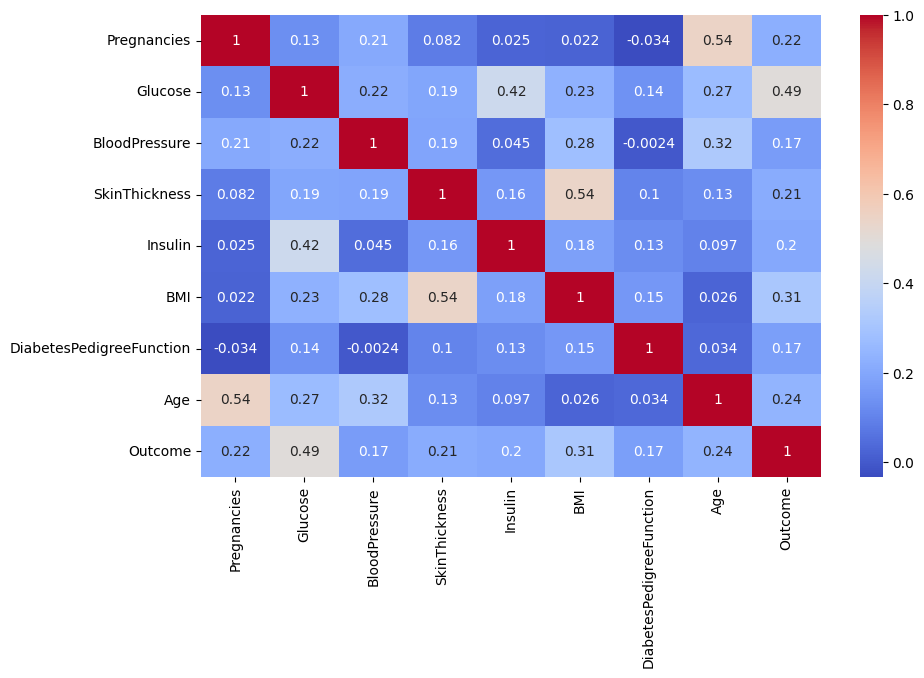

In [ ]:
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Scatter Plot: Glucose vs BMI


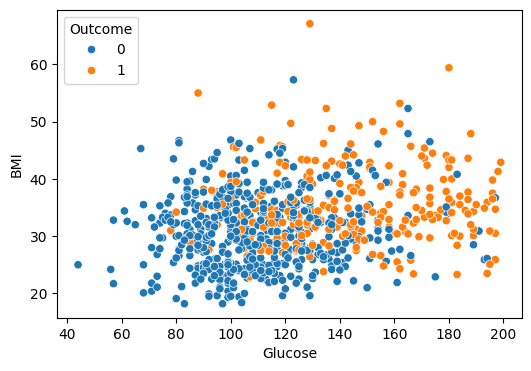

In [ ]:
print("\nScatter Plot: Glucose vs BMI")
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"])
plt.show()

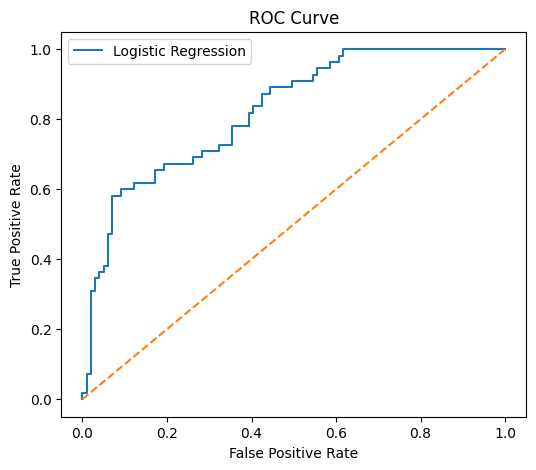

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
print("\nGenerating Learning Curve for SVM...")

train_sizes, train_scores, test_scores = learning_curve(
    SVC(), X_scaled, y, cv=5, scoring='accuracy'
)


Generating Learning Curve for SVM...


In [ ]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

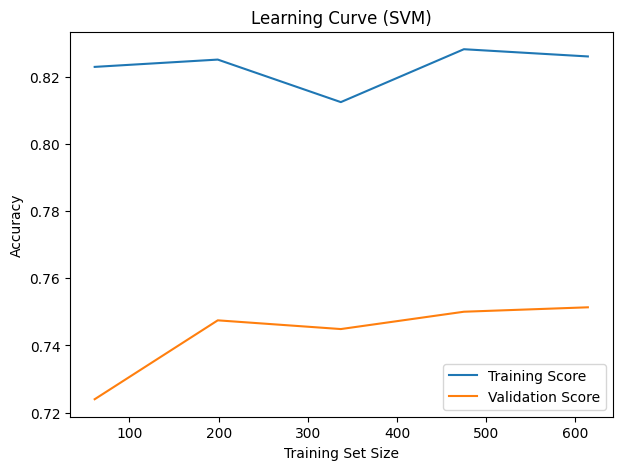

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (SVM)")
plt.legend()
plt.show()

Confusion Matrix - Logistic Regression:
[[82 17]
 [21 34]]


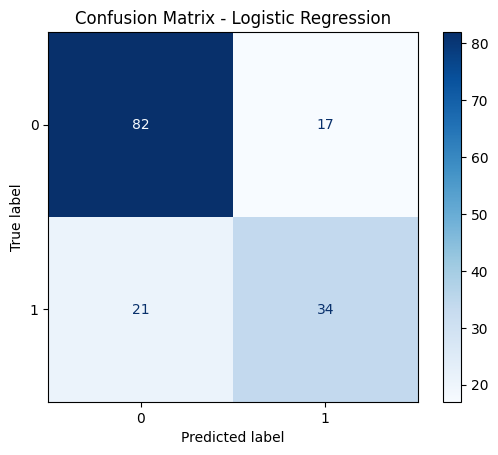


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [6]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Confusion Matrix - Logistic Regression:")
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log))


Confusion Matrix - KNN:
[[75 24]
 [17 38]]


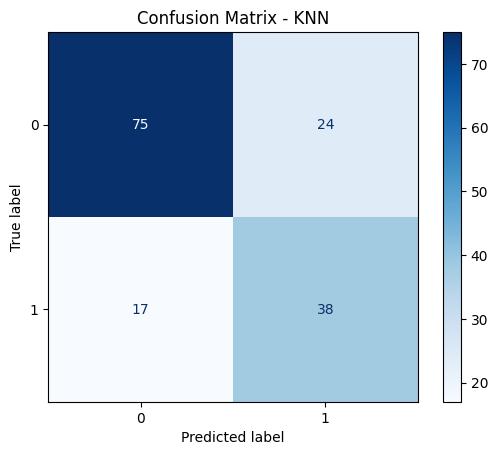


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [7]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("Confusion Matrix - KNN:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn))


Confusion Matrix - Decision Tree:
[[75 24]
 [23 32]]


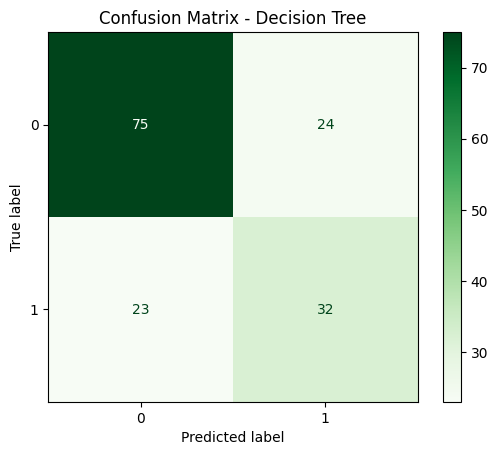


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Confusion Matrix - Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix - Random Forest:
[[80 19]
 [17 38]]


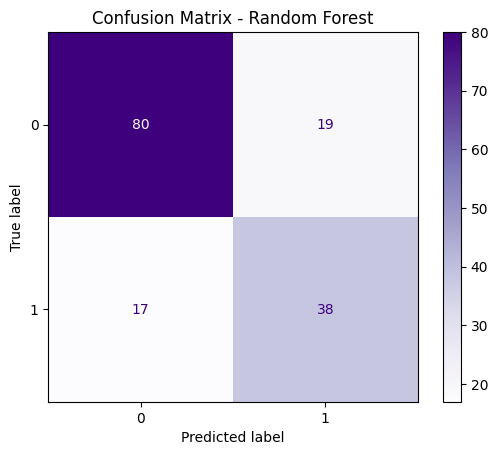


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [9]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix - Random Forest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix - SVM:
[[83 16]
 [23 32]]


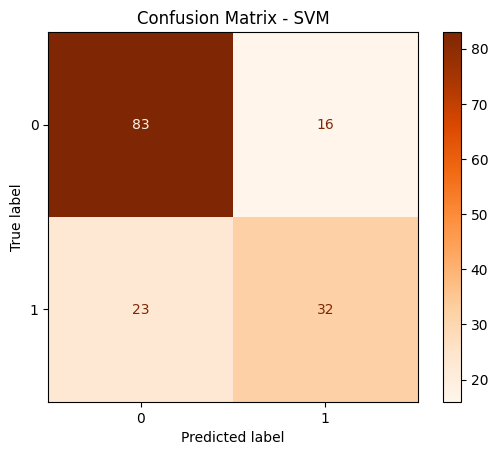


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [10]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Confusion Matrix - SVM:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.show()

print("\nClassification Report - SVM:")
print(classification_report(y_test, y_pred_svm))